# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd #импорт библиотеки

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#для изучения данных

pd.set_option('display.max_columns', 50) #вывод всех столбцов
display(data.head(10)) #первые 10 строк датасета
data.info() #общая информация

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

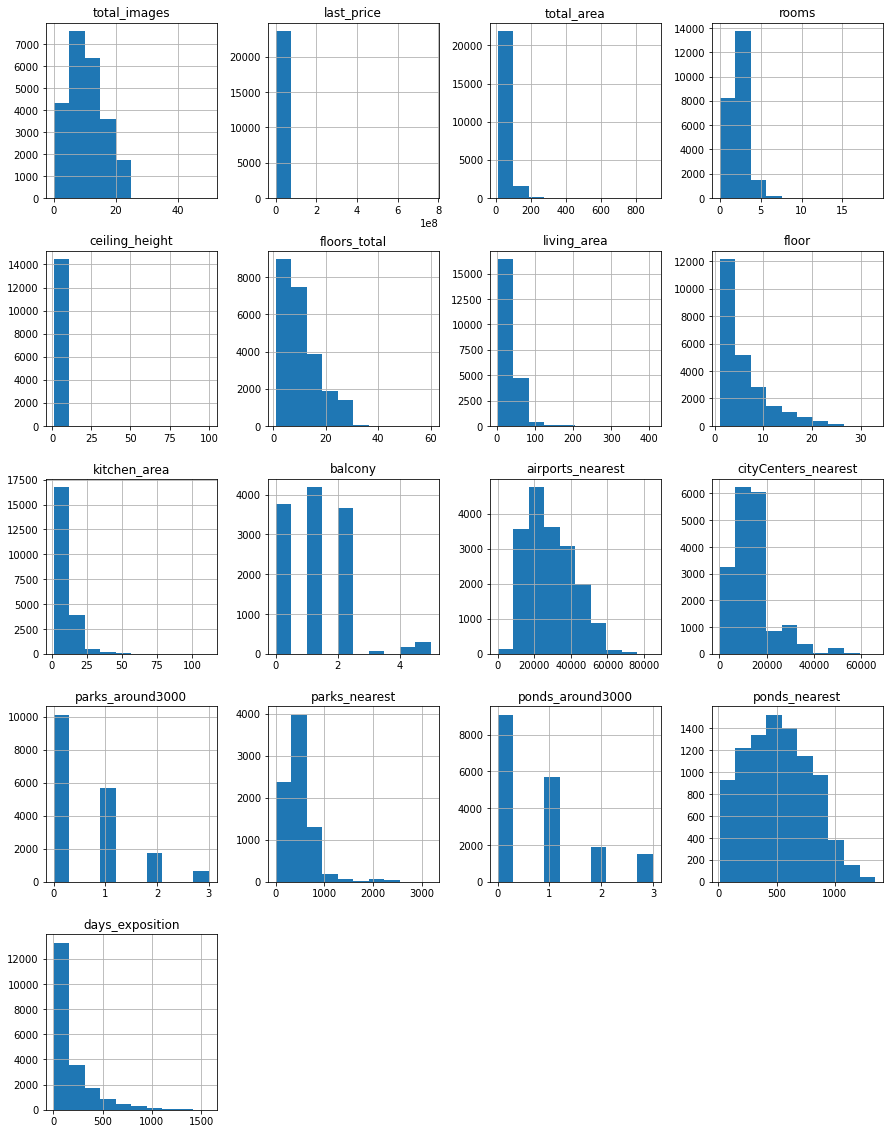

In [3]:
data.hist(figsize=(15, 20)) #построение гистрограмм
None

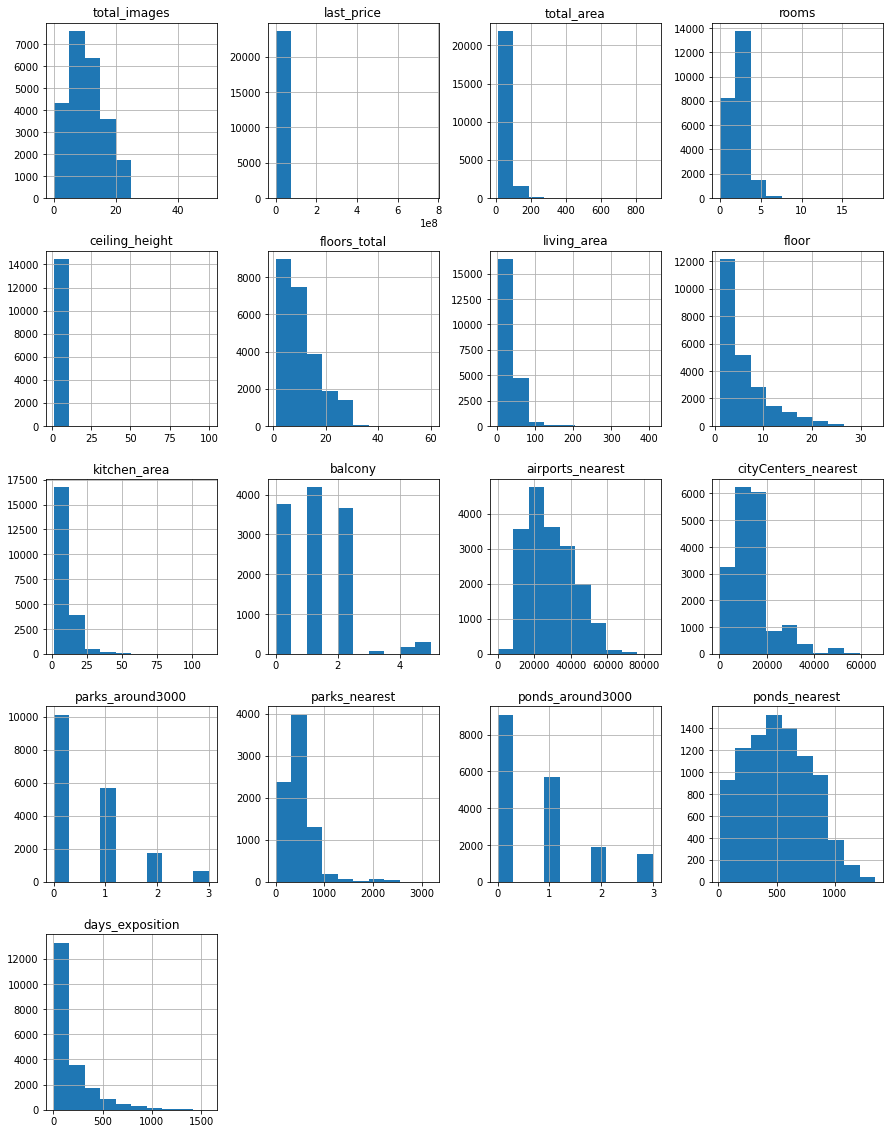

In [4]:
# Код ревьюера

data.hist(figsize=(15, 20))
None

### Предобработка данных

* **Идентификация переменных с пропущенными значениями, устранение при необходимости**


In [5]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


  Переменная        |    Возможная причина пропусков
-------------       |  -------------
**floors_total**        |  возможно, ошибка переноса данных. Пропусков этой переменной достаточно мало - данными можно попробовать пренебречь
**living_area, kitchen_area, ceiling_height**  |  заполняется вручную, не всегда владельцы могут указать
**is_apartment**    |  бинарная переменная, 0 не является пропуском
**balcony**         |  0 не является пропуском, в квартире может не быть балкона
**locality_name**       |  пропусков мало. Возможно, забыли указать - восстановить проблематично
airports_nearest, cityCenters_nearest, parks_around3000,  parks_nearest,  ponds_around3000, ponds_nearest|  картографические данные, возможна ошибка выгрузки - восстановить проблематично
**days_exposition**     | объявление могло быть размещено менее суток (покупатель нашелся быстро, востребованные характеристики) 

**жирным шрифтом** выделены переменные, которые нуждаются в обработке

In [6]:
#устранение пропусков
#в случае с количеством балконов NaN можно заменить на 0 == в квартире нет ни одного балкона
print(data['balcony'].isna().sum()) #количество пропусков
data['balcony'] = data['balcony'].fillna('0') #замена 
print(data['balcony'].isna().sum()) #количество пропусков после замены - проверка

11519
0


In [7]:
#аналогично для переменной is_apartment: NaN можно интерпретировать как False == объект не является апартаментами
print(data['is_apartment'].isna().sum())
data['is_apartment'] = data['is_apartment'].fillna('False') #замена 
print(data['is_apartment'].isna().sum())

20924
0


In [8]:
#аналогично для переменной days_exposition: NaN можно интерпретировать как 0 == с момента публикации до снятия объявление прошло менее суток
print(data['days_exposition'].isna().sum())
#print(sorted(data[data['days_exposition'].isna()]['first_day_exposition'].unique())) #дни размещения объявлений, когда переменная days_exposition была пропущена
#пропуски в переменной days_exposition наблюдаются среди объявлений, размещенных в разные дни, месяцы и годы
#как следствие, можно предположить, что описанные выше предположения верны
data['days_exposition'] = data['days_exposition'].fillna('0') #замена 
print(data['days_exposition'].isna().sum())

3181
0


In [9]:
#Там, где пропущены значения жилой площади, можно попробовать заменить пропуски медианным значением площади в зависимости от количества комнат. 
#В градостроительстве существуют стандартизированные планировочные решения. Можно опираться на типичную характеристику группы
#Как следствие, можно предположить, что заданному числу комнат соответствует определенный диапазон площади 
#За исключением более редких случаев, учесть которые не представляется возможным
median_living_area = data.groupby('rooms')['living_area'].transform('median') #расчет медианного значения жилой площади в зависимости от количества комнат
#print(median_living_area)
data['living_area'] = data['living_area'].fillna(median_living_area) #замена пропусков медианным значением

print(data['living_area'].isna().sum()) #доказательство того, что пропуски устранены

0


In [10]:
#В случае с переменной kitchen_area описанные выше рассуждения представляются не вполне подходящими
#Поиск корректирующего коэффициента
cutted = data.query('kitchen_area.isna()')['total_area'].mean()/data.query('~kitchen_area.isna()')['living_area'].mean()
print(cutted)
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']/cutted) #замена пропусков площади кухни
#print(data)

print(data['kitchen_area'].isna().sum()) #доказательство того, что пропуски устранены

1.634671499360034
0


In [11]:
#переменная ceiling_height в целом не очень вариативна, поэтому можно попробовать заменить пропуски медианным значением (из-за наличия аномально высокого максимума среднее не используется)
print(data['ceiling_height'].describe()) # потолки высотой 100 метров (и 1 метр) кажутся аномалией, медиана = 2.65 - в пределах нормы
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

print(data['ceiling_height'].isna().sum()) #доказательство того, что пропуски устранены

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64
0


In [12]:
data = data.query('(~floors_total.isna()) and ~(locality_name.isna())')

In [13]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition             0
dtype: int64


* **Изучение типов данных, замена при необходимости**

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  object 
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

* переменная days_exposition должна быть преобразована в целочисленную - количество дней не может быть дробным (оставлять в виде строки некорректно)
___
* переменная balcony должна быть преобразована в целочисленную - количество балконов не может быть дробным (оставлять в виде строки некорректно)
___
* переменная first_day_exposition должна быть преобразована в более читабельный вид - формат даты
___
* переменная floors_total должна быть преобразована в целочисленную - количество этажей не может быть дробным

In [15]:
data['days_exposition'] = data['days_exposition'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

* Поиск уникальных значений, очистка от неявных дубликатов

In [16]:
data['locality_name'] = data['locality_name'].str.replace("поселок", "посёлок") #корректировка названия населенного пункта
data['locality_name'] = data['locality_name'].str.replace("посёлок городского типа", "посёлок") #корректировка названия населенного пункта
data['locality_name'].drop_duplicates() #удаление дубликатов
#display(data['locality_name'].value_counts())
#display(sorted(data['locality_name'].unique()))


0                  Санкт-Петербург
1                   посёлок Шушары
5        городской посёлок Янино-1
6                посёлок Парголово
8                   посёлок Мурино
                   ...            
22938               деревня Нижняя
23048    коттеджный посёлок Лесное
23354            деревня Тихковицы
23411       деревня Борисова Грива
23683         посёлок Дзержинского
Name: locality_name, Length: 329, dtype: object

* **Очистка от аномалий**
___
Переменная 'ceiling_height' нуждается в обработке - присутствуют аномальные значения


In [17]:
#Переменная ceiling_height
print(sorted(data['ceiling_height'].unique())) #идентификация уникальных значений переменной

[1.0, 1.2, 1.75, 2.0, 2.2, 2.25, 2.3, 2.34, 2.4, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5, 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6, 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5.6, 5.8, 6.0, 8.0, 8.3, 10.3, 

In [18]:
def categorize_height(row):
    value = row['ceiling_height']
    
    if 0<=value<2.5:
        return('неправдоподобно малая величина')
    if 2.5<=value<=5.0: #потолки в целом могут быть высокими
        return(value)
    if value==25 or value==26 or value==27 or value==27.5 or value==32.0:
        return(value/10)
    else:
        return('неправдоподобно большая величина')
    
data['height_category'] = data.apply(categorize_height, axis=1) #применение функции к датасету
data = data.query('height_category!="неправдоподобно большая величина"')
data = data.query('height_category!="неправдоподобно малая величина"')

In [19]:
print(sorted(data['height_category'].unique())) #проверка того, что все аномальные значения устранены

[2.5, 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6, 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0]


Переменная, обозначающая количество комнат в квартире, нуждается в обработке (Фигурируют аномально высокие значения)

In [20]:
# Переменная 'rooms':
print(sorted(data['rooms'].unique()))
#6 комнат, как предполагается, является максимальным порогом (объединение двух квартир по 3 компаны, например)
#0 комнат - неоднозначная характеристика (может не быть изолированных комнат, если квартира является студией)
print(data[data['rooms']>=6]['rooms'].count()) #проверка количества неправдоподобных значений (если не очень много, можно убрать)
print(data['rooms'].count()) #вывод общего количества наблюдений по столбцу

share = round((data[data['rooms']>=6]['rooms'].count())/(data['rooms'].count())*100,1)#расчет доли наблюдений, которые планируется отбросить
print(f'Потери от очистки неправдоподобных значений = {share} (менее 1 процента -> можно отбросить)')
data = data.query('rooms<=6') #очистка от неправдоподобно высоких значений


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 19]
193
23475
Потери от очистки неправдоподобных значений = 0.8 (менее 1 процента -> можно отбросить)


In [21]:
# Переменная 'total_area':
#квартиры в целом могут быть очень большими и совсем маленькими, избавляться от них,как представляется, не вполне правильно
print(data['total_area'].describe())
#display(sorted(data['total_area'].unique()))

count    23385.000000
mean        59.479495
std         31.871422
min         12.000000
25%         40.000000
50%         52.000000
75%         69.200000
max        507.000000
Name: total_area, dtype: float64


In [22]:
# Переменная 'living_area':
display(data['living_area'].describe())
data[data['living_area']<10]['living_area'].count() #меньше 10 метров жилой площади представляется нереалистичным значением
data = data.query('living_area > 10') #очистка от нереалистичных значений

count    23385.000000
mean        33.788080
std         19.533103
min          2.000000
25%         18.400000
50%         30.200000
75%         42.500000
max        301.500000
Name: living_area, dtype: float64

In [23]:
# Переменная 'kitchen_area':
display(data['kitchen_area'].describe())
#площадь кухни > 40 м кажется не вполне реалистичной
#площадь кухни < 5 м кажется не вполне реалистичной
print(data[data['kitchen_area']<5]['kitchen_area'].count()+ data[data['kitchen_area']>30]['kitchen_area'].count())

data = data.query('5 < kitchen_area < 40')

count    23329.000000
mean        12.702709
std         11.146729
min          1.300000
25%          7.300000
50%         10.000000
75%         13.300000
max        305.871853
Name: kitchen_area, dtype: float64

1415


In [24]:
# Переменная 'floors_total':
display(data['floors_total'].describe())
#сложно представить себе дома в Санкт-Петербурге, превышающие 40 этажей
print(data[data['floors_total']>40]['floors_total'].count())
data = data.query('floors_total < 40')

count    22212.000000
mean        10.815955
std          6.607304
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

2


### Посчитайте и добавьте в таблицу новые столбцы

In [25]:
data['price_per_m'] = data['last_price']/data['total_area'] #создание нового столбца с ценой за квадратный метр
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday #создание нового столбца с днем недели публикации
data['month_exposition'] = data['first_day_exposition'].dt.month # создание нового столбца с месяцем публикации
data['year_exposition'] = data['first_day_exposition'].dt.year # создание нового столбца с годом публикации
#display(data)

In [26]:
def categorize_floor(row):
    value1 = row['floor']
    value2 = row['floors_total']
    
    if value1==1:
        return('первый')
    if value1==value2:
        return('последний')
    else:
        return('другой')
    
#создание переменной, обозначающей тип этажа квартиры
data['floor_category'] = data.apply(categorize_floor, axis=1) #применение функции к датасету
#display(data)

In [27]:
#создание переменной, обозначающей расстояние до центра города в километрах
data['distance_km'] = round(data['cityCenters_nearest']/1000)
display(data)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,height_category,price_per_m,weekday_exposition,month_exposition,year_exposition,floor_category,distance_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,2.7,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,2.65,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,2.65,92785.714286,3,8,2015,другой,14.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.4,5,False,False,False,9.100000,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55,2.65,95065.789474,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.6,6,False,False,False,14.400000,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155,2.65,99195.710456,3,11,2017,другой,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.3,3,False,False,False,13.830000,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,0,3.7,72490.845228,1,3,2017,другой,4.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.0,4,False,False,False,8.500000,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45,2.65,52542.372881,0,1,2018,другой,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3,29.7,1,False,False,False,34.685868,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,0,2.65,44091.710758,6,2,2018,первый,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,30.5,12,False,False,False,23.300000,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602,3.0,149511.400651,1,3,2017,другой,10.0


### Проведите исследовательский анализ данных

* **Пункт 4.1**

,total_area
count,22210.000000
mean,58.227867
std,28.638937
min,13.000000
25%,40.000000
50%,51.300000
75%,67.800000
max,441.980000


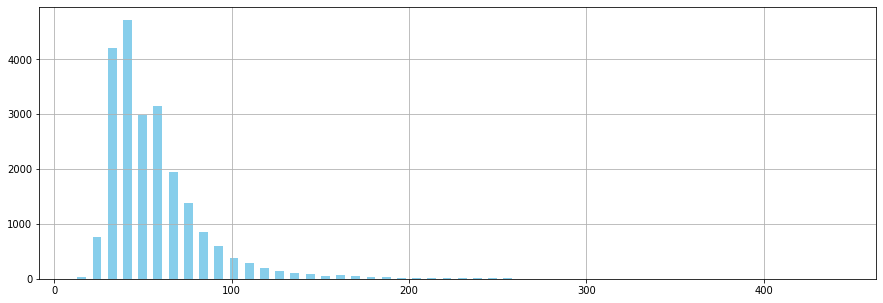

In [28]:
#переменная 'total_area':

data['total_area'].hist(figsize=(15, 5), bins = 50, color='skyblue',width=5)
pd.DataFrame(data['total_area'].describe())

Общая площадь объектов, представленных в выборке, колеблется в диапазоне от 13 до 442 кв. м. Площадь большей части квартир не превышает 100 кв.м. 

,living_area
count,22210.000000
mean,33.276426
std,18.483041
min,10.080000
25%,18.200000
50%,30.000000
75%,42.000000
max,250.000000


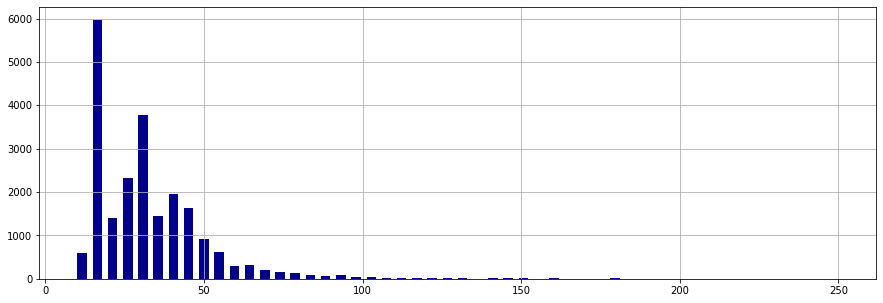

In [29]:
#переменная 'living_area':

data['living_area'].hist(figsize=(15, 5), bins = 50, color='darkblue',width=3)
pd.DataFrame(data['living_area'].describe())
#data['living_area'].value_counts()

Жилая площадь объектов, представленных в выборке, колеблется в диапазоне от 10 до 250 кв. м. Жилая площадь большей части квартир не превышает 50 кв.м. 
Квартир с жилой площадью ~18 м.кв. и ~30 кв.м. больше, чем остальных

,kitchen_area
count,22210.000000
mean,11.487183
std,6.313018
min,5.040000
25%,7.500000
50%,9.900000
75%,13.000000
max,39.900000


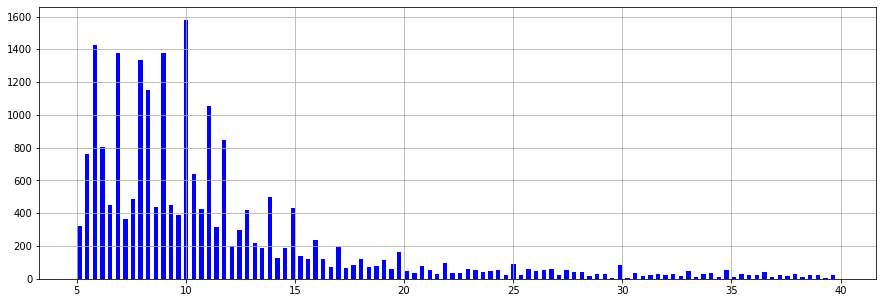

In [30]:
#переменная 'kitchen_area':

data['kitchen_area'].hist(figsize=(15, 5), bins = 100, color='blue',width=0.2)
pd.DataFrame(data['kitchen_area'].describe())
#data['kitchen_area'].value_counts()

Площадь кухни объектов, представленных в выборке, колеблется в диапазоне от 5 до 40 кв. м. Площадь кухни большей части квартир не превышает 15 кв.м. 
Чаще всего в квартирах из выборки площадь кухни = 6, 10, 8, 9 и 7 кв. метров.

,last_price
count,22210.000000
mean,6.056245
std,7.202548
min,0.430000
25%,3.430000
50%,4.600000
75%,6.600000
max,401.300000


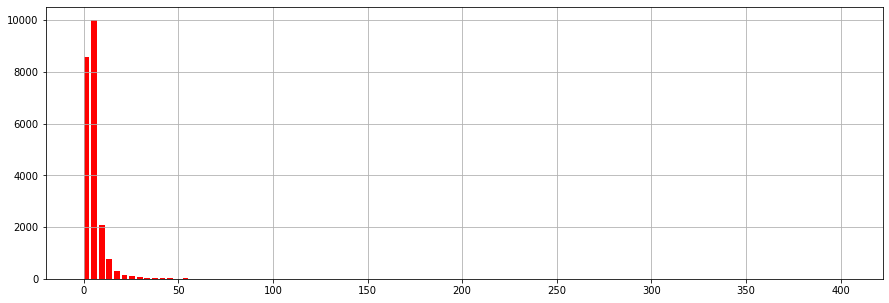

In [31]:
#переменная 'last_price':
(data['last_price']/1000000).hist(figsize=(15, 5), range = (0,402), bins = 100, color='red',width=3) #перевод в млн. рублей для удобства
pd.DataFrame(data['last_price']/1000000).describe()
#(data['last_price']/1000000).value_counts()

<AxesSubplot:>

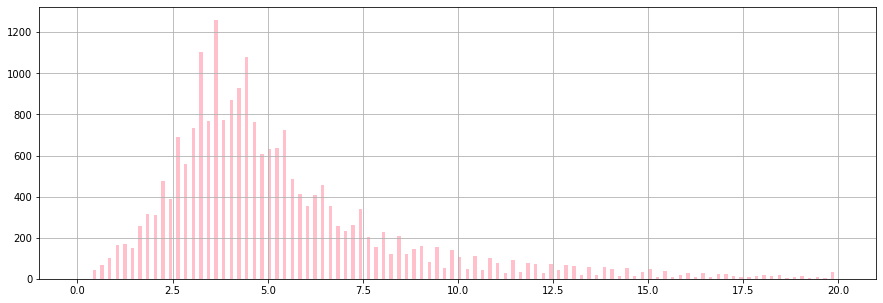

In [32]:
(data['last_price']/1000000).hist(figsize=(15, 5), range = (0,20), bins = 100, color='pink',width=0.09) #укрупненная гистограмма для большей наглядности

Цена объектов, представленных в выборке, колеблется в диапазоне от 430 тыс. до 401 млн. рублей. Цена большей части квартир не превышает 20 млн. рублей 
Чаще всего цена квартир из выборки = 4-4,5 млн. рублей

,rooms
count,22210.000000
mean,2.020576
std,0.991785
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,6.000000


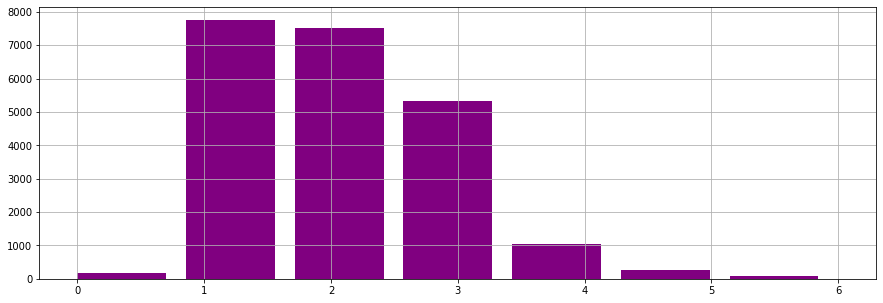

In [33]:
#переменная 'rooms':

data['rooms'].hist(figsize=(15, 5), bins = 7, color='purple',width=0.7)
pd.DataFrame(data['rooms']).describe()
#data['rooms'].value_counts()

Количество комнат объектов из выборки колеблется от 0 (планировка без изолированных комнат) до 6. Чаще всего в выборке встречаются однокомнатные квартиры, немного реже - двухкомнатные. Реже всего встречаются объекты с 6 комнатами.

,height_category
count,22210.00
unique,145.00
top,2.65
freq,9176.00


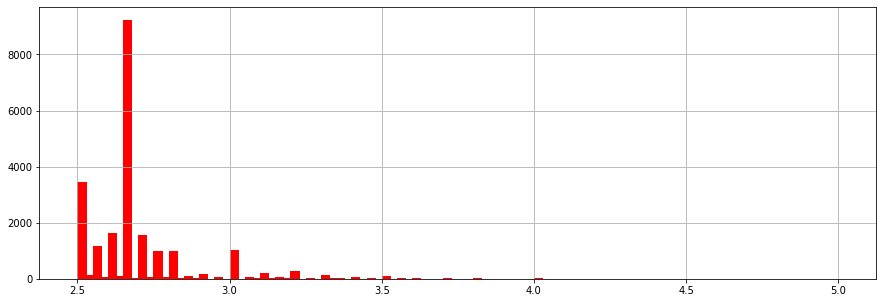

In [34]:
#переменная 'height_category':

data['height_category'].hist(figsize=(15, 5), bins = 100, color='red',width=0.03)
pd.DataFrame(data['height_category']).describe()
#data['height_category'].value_counts()

Чаще всего объекты из выборки характеризуются высотой потолков от 2.5 до 2.65 метров

,floor
count,22210.000000
mean,5.937281
std,4.900283
min,1.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,33.000000


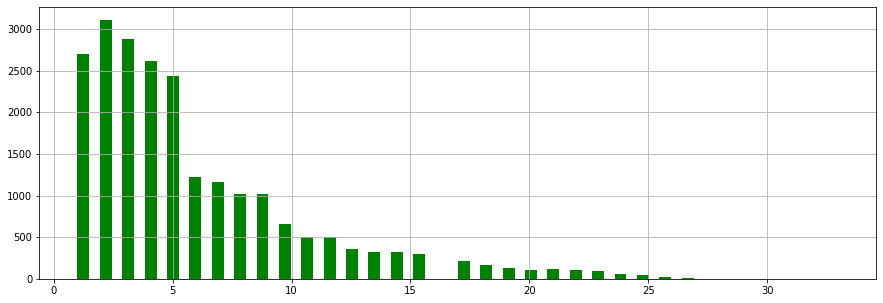

In [35]:
#переменная 'floor':

data['floor'].hist(figsize=(15, 5), bins = 34, color='green',width=0.5)
pd.DataFrame(data['floor']).describe()
#data['floor'].value_counts()

Объекты из выборки расположены на разных этажах (от 1 до 33). Чаще всего в продаже можно было увидеть квартиры на 2 этаже (наибольшая концентрация наблюдалась в диапазоне от 1 до 5 этажа), реже всего - на 28 - 33 этажах.

другой       16445
последний     3062
первый        2703
Name: floor_category, dtype: int64

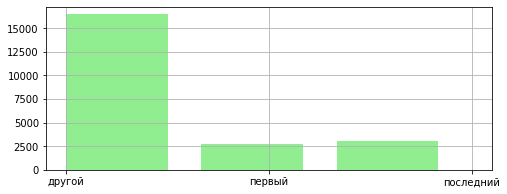

In [36]:
#переменная 'floor_category':

data['floor_category'].hist(figsize=(8, 3), bins = 3, color='lightgreen',width=0.5)
pd.DataFrame(data['floor_category']).describe()
data['floor_category'].value_counts()

Первые и последние этажи встречаются реже (по сравнению с остальными)

,floors_total
count,22210.000000
mean,10.811887
std,6.593564
min,1.000000
25%,5.000000
50%,9.000000
75%,16.000000
max,36.000000


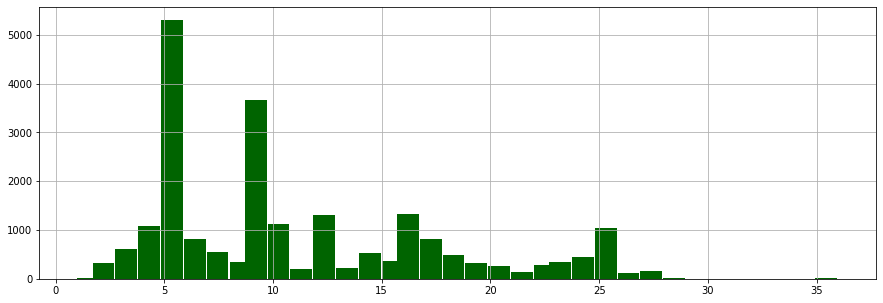

In [37]:
#переменная 'floors_total':

data['floors_total'].hist(figsize=(15, 5), bins = 100, color='darkgreen',width=1)
pd.DataFrame(data['floors_total']).describe()
#data['floors_total'].value_counts()

Этажность домов варьируется от 1 до 36 этажей. Чаще всего выставлялись квартиры в пятиэтажных домах, немного реже - в девятиэтажных. 34-36 этажей встречались крайне редко.

,cityCenters_nearest
count,17010.000000
mean,14.253315
std,8.460520
min,0.181000
25%,9.550250
50%,13.177500
75%,16.293000
max,65.968000


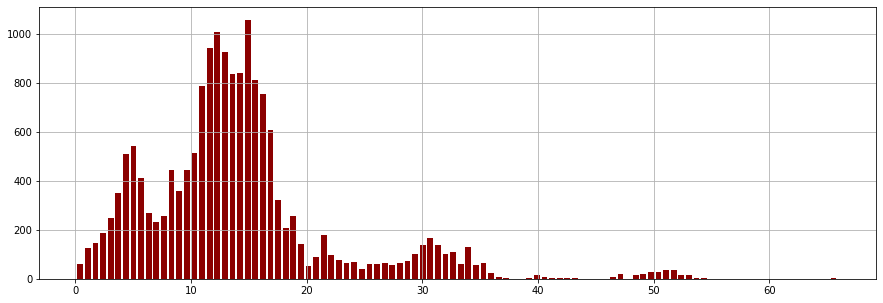

In [38]:
#переменная 'cityCenters_nearest':

(data['cityCenters_nearest']/1000).hist(figsize=(15, 5), bins = 100, color='darkred',width=0.5) #перевод в км.
pd.DataFrame(data['cityCenters_nearest']/1000).describe()
#(data['cityCenters_nearest']/1000).value_counts()

Расстояние до центра города варьируется от 0.2 до 66 км. (Это вполне логично, в выборке большое количество пригородных объектов)

,airports_nearest
count,16990.000000
mean,28.845927
std,12.663182
min,0.000000
25%,18.500000
50%,26.885500
75%,37.407000
max,84.869000


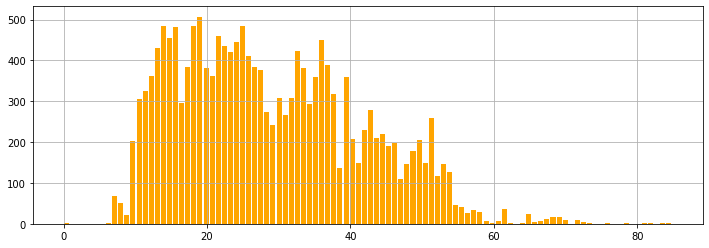

In [39]:
#переменная 'airports_nearest':

(data['airports_nearest']/1000).hist(figsize=(12, 4), bins = 100, color='orange',width=0.7) #перевод в км.
pd.DataFrame(data['airports_nearest']/1000).describe()
#(data['airports_nearest']/1000).value_counts()

Расстояние до ближайшего аэропорта варьируется от 0 до 85 км.

0.441    64
0.392    40
0.456    40
0.173    37
2.102    29
         ..
0.938     1
0.932     1
0.973     1
1.074     1
1.722     1
Name: parks_nearest, Length: 980, dtype: int64

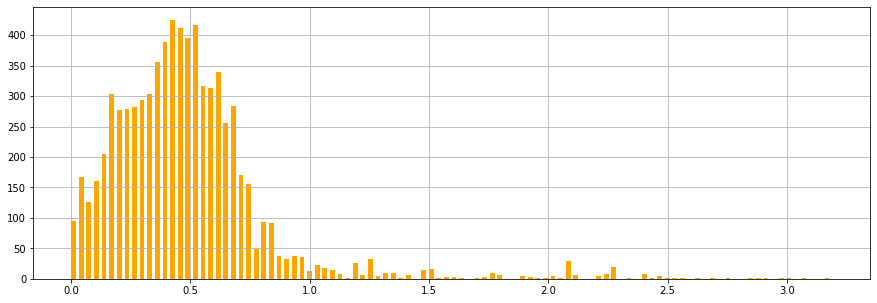

In [40]:
#переменная 'parks_nearest':

(data['parks_nearest']/1000).hist(figsize=(15, 5), bins = 100, color='orange',width=0.02) #перевод в км.
pd.DataFrame(data['parks_nearest']/1000).describe()
(data['parks_nearest']/1000).value_counts()

Чаще всего парк расположен не ближе 441 метров и не дальше 2 км.

<AxesSubplot:>

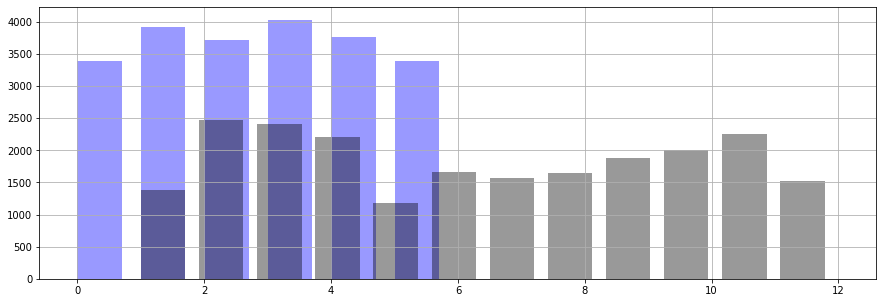

In [41]:
#weekday_exposition
data['weekday_exposition'].hist(figsize=(15, 5), bins = 6, color='blue',width=0.7, alpha = 0.4)


#month_exposition
data['month_exposition'].hist(figsize=(15, 5), bins = 12, color='black',width=0.7, alpha = 0.4)

**День:** Чаще всего объявления о продаже выставлялись в четверг и вторник, реже всего - в воскресенье.
___
**Месяц:** Чаще всего объявления о продаже выставлялись в феврале и марте, реже всего - в январе и мае.

* **Пункт 4.2**

       days_exposition
count     22210.000000
mean        155.940882
std         212.422070
min           0.000000
25%          22.000000
50%          73.000000
75%         198.000000
max        1580.000000

0       2945
45       835
60       467
7        218
30       201
        ... 
1112       1
1080       1
1064       1
1032       1
1391       1
Name: days_exposition, Length: 1121, dtype: int64


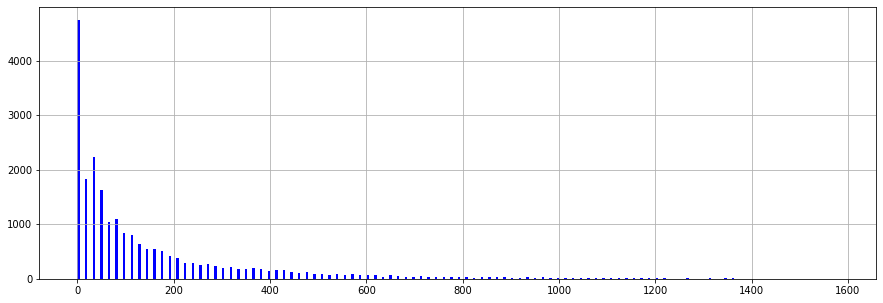

In [42]:
#days_exposition
data['days_exposition'].hist(figsize=(15, 5), bins = 100, color='blue',width=5, alpha = 1)
print(pd.DataFrame(data['days_exposition']).describe())
print()
print(data['days_exposition'].value_counts())

Наибольшее количеcтво объявлений было размещено менее суток. Возможно, они были очень востребованными и претендентов на покупку было много. (Или совсем новые объявления - на момент выгрузки данных они были размещены менее суток)
___
В среднем объявления активны в течение 156 дней.

Медиана = 73 дня (выглядит более правдоподобно, без искажения за счет наличия слишком больших значений)
___
Однако были объявления, которые были размещены более 3 лет - крайне невостребованные (возможно, не очень неблагоприятное для покупателей сочетание характеристик)
___
Быстрыми продажами кажутся продажи, осуществленные менее чем за 3 недели
Необычно долгие продажи - 800 дней и более.

* **Пункт 4.3**

In [43]:
#влияние на стоимость объекта
#Цена в зависимости от общей площади
dependence_total_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc = 'median')
dependence_total_area.columns = ['median_price'] 
#display(dependence_total_area)

In [44]:
#Исправленная версия

dependence_ta = data.pivot_table(index='total_area', values='last_price', aggfunc = 'mean')
dependence_ta = dependence_ta.reset_index()

#display(dependence_ta)

In [45]:
import matplotlib.pyplot as plt #импорт библиотек
import seaborn as sb

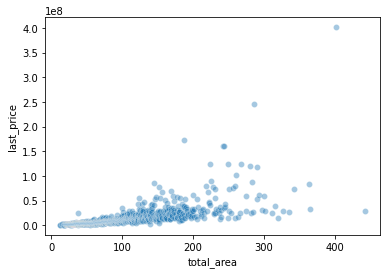

,total_area,last_price
total_area,1.0000,0.6722
last_price,0.6722,1.0000


In [46]:
sb.scatterplot(data = dependence_ta, x = 'total_area', y = 'last_price', alpha = 0.4) #построение графика
sb.set(rc={'figure.figsize':(8,4)})
plt.show() 
display(dependence_ta.corr()) #вывод корреляционной матрицы
#print(dependence_ta['total_area'].corr(dependence_ta['last_price'])) #альтернативный способ расчета корреляции

За исключением некоторых выбросов, можно наблюдать положительный тренд: С увеличением общей площади объекта в среднем при прочих равных увеличивается цена продажи.

Коэффициент корреляции = 0.67, что говорит о положительной зависимости стоимости объекта от общей площади.

In [47]:
#Цена в зависимости от жилой площади
data['last_price_mln'] = data['last_price']/1000000
dependence_living_area = data.pivot_table(index = 'living_area', values = 'last_price_mln', aggfunc = 'mean')
dependence_living_area.columns = ['mean_price'] 
#display(dependence_living_area)

In [48]:
#data.pivot_table(index='living_area', values='last_price', aggfunc = 'mean').plot(color = 'darkblue')

In [49]:
#Исправленная версия
dependence_la = data.pivot_table(index='living_area', values='last_price_mln', aggfunc = 'mean').reset_index()
#display(dependence_la)

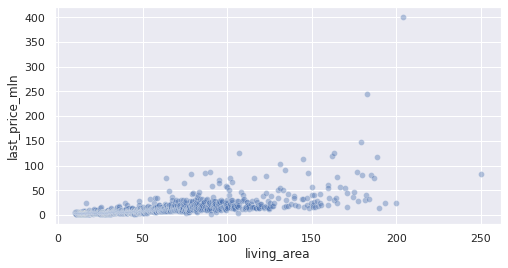

<AxesSubplot:>

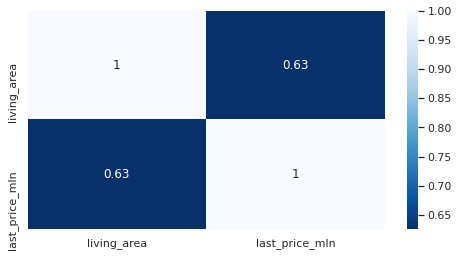

In [50]:
sb.scatterplot(data = dependence_la, x = 'living_area', y = 'last_price_mln', alpha = 0.4) #построение графика
sb.set(rc={'figure.figsize':(8,4)})
plt.show() 
#print(dependence_la['last_price_mln'].corr(dependence_la['living_area'])) #не сработало
sb.heatmap(dependence_la.corr(), annot = True, cmap = 'Blues_r')

Ситуация аналогична описанной выше (с жилой площадью).

Наблюдается положительный тренд: чем выше жилая площадь, тем выше цена (в среднем при прочих равных). Коэффициент корреляции = 0.63 -> положительная связь

In [51]:
#Старая версия

#Цена в зависимости от площади кухни
dependence_kitchen_area = data.pivot_table(index = 'kitchen_area', values = 'last_price_mln', aggfunc = 'mean')
dependence_kitchen_area.columns = ['mean_price'] 
#display(dependence_kitchen_area)

In [66]:
#data.pivot_table(index='kitchen_area', values='last_price_mln', aggfunc = 'mean').plot(color = 'darkred')

In [53]:
#Исправленная версия
dependence_ka = data.pivot_table(index='kitchen_area', values='last_price_mln', aggfunc = 'mean').reset_index()
#display(dependence_ka)

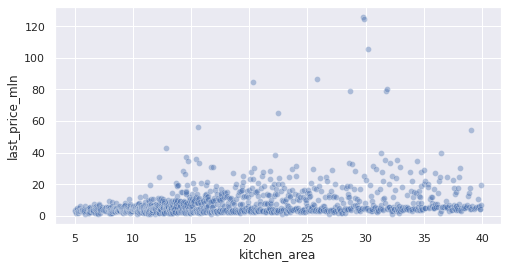

<AxesSubplot:>

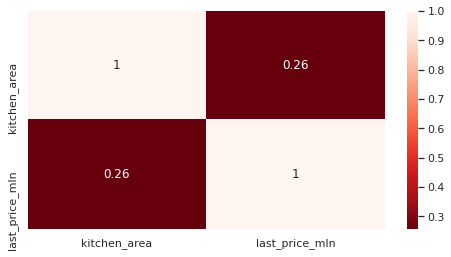

In [54]:
sb.scatterplot(data = dependence_ka, x = 'kitchen_area', y = 'last_price_mln', alpha = 0.4) #построение графика
sb.set(rc={'figure.figsize':(8,4)})
plt.show() 
#print(dependence_ka['last_price_mln'].corr(dependence_ka['kitchen_area']))
sb.heatmap(dependence_ka.corr(), annot = True, cmap = 'Reds_r')

При относительно невысоком значении площади от 5 до 15 кв.м. можно увидеть участок с положительным трендом. Далее больше похоже на случайное блуждание. Цена кухни оказывает не столь существенное влияние на стоимость квартры
___
Коэффициент корреляции очень маленький = 0.26. Можно предположить, что устойчивой связи нет

In [55]:
#Цена в зависимости от количества комнат

dependence_rooms = data.pivot_table(index = 'rooms', values = 'last_price_mln', aggfunc = 'mean')
dependence_rooms.columns = ['mean_price'] 
display(dependence_rooms)

,mean_price
rooms,
0,2.879528
1,3.834023
2,5.520002
3,7.772455
4,12.608367
5,20.629591
6,28.068220


<AxesSubplot:xlabel='rooms'>

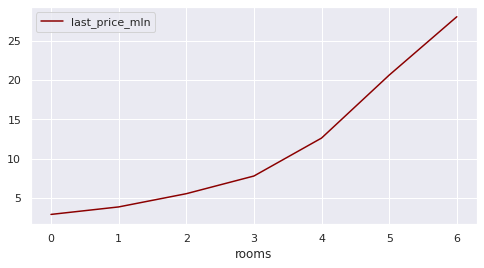

In [56]:
data.pivot_table(index='rooms', values='last_price_mln', aggfunc = 'mean').plot(color = 'darkred')

Количество комнат очевидно оказывает положительное влияние на стоимость жилья. Наибольший прирост стоимости объекта от дополнительной комнаты наблюдается при рассмотрении квартир с 4-6 комнатами.

In [57]:
#Цена в зависимости от этажа квартиры

dependence_floor_category = data.pivot_table(index = 'floor_category', values = 'last_price_mln', aggfunc = ['mean'])
dependence_floor_category.columns = ['mean_price'] 
display(dependence_floor_category)

,mean_price
floor_category,
другой,6.270360
первый,4.582062
последний,6.207650


<AxesSubplot:title={'center':'dependence_floor_category'}, xlabel='floor_category'>

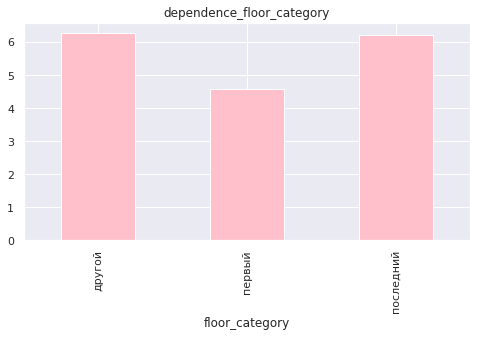

In [58]:
data.pivot_table(index = 'floor_category', values = 'last_price_mln', aggfunc = ['mean']).plot(kind = 'bar', color = 'pink', title = 'dependence_floor_category', grid=True, legend = False)

Стоимость квартир на первых этажах меньше, чем на остальных

In [59]:
#weekday_exposition, month_exposition, year_exposition

dependence_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'last_price_mln', aggfunc = ['mean'])
dependence_weekday_exposition.columns = ['mean_price'] 
display(dependence_weekday_exposition)

dependence_month_exposition = data.pivot_table(index = 'month_exposition', values = 'last_price_mln', aggfunc = ['mean'])
dependence_month_exposition.columns = ['mean_price'] 
display(dependence_month_exposition)

dependence_year_exposition = data.pivot_table(index = 'year_exposition', values = 'last_price_mln', aggfunc = ['mean'])
dependence_year_exposition.columns = ['mean_price'] 
display(dependence_year_exposition)


,mean_price
weekday_exposition,
0,6.140262
1,6.032802
2,5.999337
3,6.328016
4,5.923073
5,5.938598
6,5.826557


,mean_price
month_exposition,
1,5.986497
2,6.146074
3,5.982187
4,6.068117
5,6.030529
6,6.027199
7,5.900000
8,6.191884
9,6.211541


,mean_price
year_exposition,
2014,11.283386
2015,7.593751
2016,6.381557
2017,5.936460
2018,5.676353
2019,6.355831


<AxesSubplot:title={'center':'dependence_year_exposition'}, xlabel='year_exposition'>

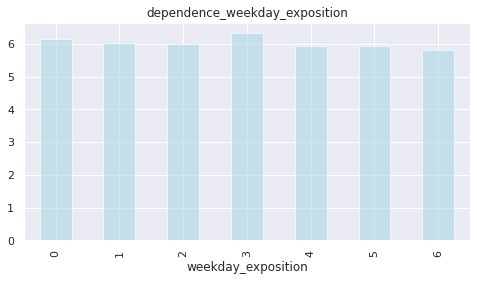

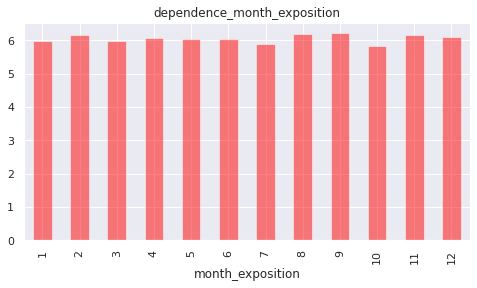

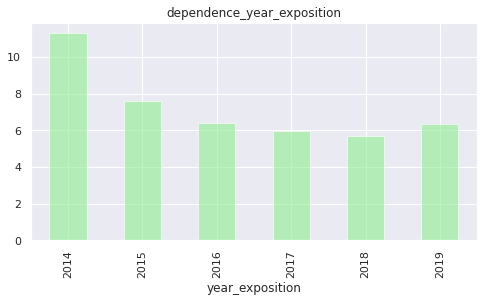

In [60]:
data.pivot_table(index = 'weekday_exposition', values = 'last_price_mln', aggfunc = ['mean']).plot(kind = 'bar', color = 'lightblue', title = 'dependence_weekday_exposition', grid=True, legend = False, alpha = 0.6)

data.pivot_table(index = 'month_exposition', values = 'last_price_mln', aggfunc = ['mean']).plot(kind = 'bar', color = 'red', title = 'dependence_month_exposition', grid=True, legend = False, alpha = 0.5)

data.pivot_table(index = 'year_exposition', values = 'last_price_mln', aggfunc = ['mean']).plot(kind = 'bar', color = 'lightgreen', title = 'dependence_year_exposition', grid=True, legend = False, alpha = 0.6)


* Средняя цена продажи квартир, выставленных в четверг наибольшая, а в воскресенье - наименьшая.

* Максимальная средняя цена продажи квартир наблюдалась в августе, минимальная - в октябре.

* С 2014 по 2018 год средняя цена продажи снижалась, в 2019 году наблюдался небольшой прирост стоимости. 

* **Пункт 4.4**

                   count
Санкт-Петербург    14753
посёлок Мурино       531
посёлок Шушары       422
Всеволожск           385
Колпино              324
Пушкин               322
посёлок Парголово    319
деревня Кудрово      294
Гатчина              279
Выборг               211

                     price_per_m
locality_name                   
Всеволожск          69039.321300
Выборг              58367.483329
Гатчина             69187.192173
Колпино             75372.039100
Пушкин             103607.244592
Санкт-Петербург    113061.570584
деревня Кудрово     92483.481937
посёлок Мурино      85477.217156
посёлок Парголово   90519.484010
посёлок Шушары      78920.254178


<AxesSubplot:title={'center':'Средняя цена за квадратный метр по 10 населенным пунктам с наибольшим числом объявлений'}, xlabel='locality_name'>

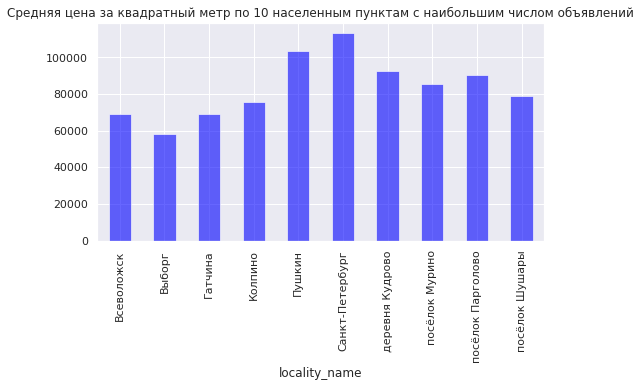

In [61]:
loc_data = pd.DataFrame(data['locality_name'].value_counts().head(10))
loc_data.columns = ['count']
print(loc_data) #10 населенных пунктов с наибольшим числом объявлений
print() #пустая строка для красоты
#список локаций из loc_data
col = ['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск', 'Колпино', 'Пушкин', 'посёлок Парголово', 'деревня Кудрово', 'Гатчина', 'Выборг']

location_data = data.query('locality_name in @col') #данные по 10 населенным пунктам с наибольшим числом объявлений
location_data = location_data.pivot_table(index = 'locality_name', values = 'price_per_m', aggfunc = 'mean') #свод
print(location_data)

location_data.plot(kind = 'bar', color = 'blue', title = 'Средняя цена за квадратный метр по 10 населенным пунктам с наибольшим числом объявлений', grid=True, legend = False, alpha = 0.6)

В Санкт-Петербурге самая большая цена за квадратный метр жилья. В Выборге - самая маленькая (среди 10 населенных пунктов с наибольшим количеством объявлений)

In [62]:
data['price_per_m']=round(data['price_per_m'], 1) #для удобства
min_price = pd.DataFrame(sorted(data['price_per_m'])).head(10) # минимальные цены
#print(min_price)

max_price = pd.DataFrame(sorted(data['price_per_m'])).tail(10) # максимальные цены
print(max_price)

col_min = [7963.0, 9615.4, 10185.2, 10368.7, 10507.2, 10561.8, 10714.3, 10769.2, 10897.4, 10925.9]
col_max = [658436.2, 660000.0, 719298.2, 721519.0, 848484.8, 857542.9, 995983.9, 1000748.1, 1542604.8]

min_price_data = data.query('price_per_m in @col_min') #данные по 10 позициям с минимальными ценами за кв/м
min_price_data = min_price_data.pivot_table(index = 'price_per_m', values = 'locality_name', aggfunc = 'first')
print('')
print('Населенные пункты с минимальной стоимостью за кв/м')
print(min_price_data)

max_price_data = data.query('price_per_m in @col_max') #данные по 10 позициям с минимальными ценами за кв/м
max_price_data = max_price_data.pivot_table(index = 'price_per_m', values = 'locality_name', aggfunc = 'first')
print('')
print('Населенные пункты с максимальной стоимостью за кв/м')
print(max_price_data)

               0
22200   658436.2
22201   660000.0
22202   719298.2
22203   721519.0
22204   848484.8
22205   848484.8
22206   857542.9
22207   995983.9
22208  1000748.1
22209  1542604.8

Населенные пункты с минимальной стоимостью за кв/м
                          locality_name
price_per_m                            
7963.0            посёлок станции Свирь
9615.4                           Сланцы
10185.2                          Сланцы
10368.7              деревня Старополье
10507.2                         Гатчина
10561.8                          Сланцы
10714.3      городской посёлок Будогощь
10769.2                          Сланцы
10897.4                         Гатчина
10925.9                          Сланцы

Населенные пункты с максимальной стоимостью за кв/м
               locality_name
price_per_m                 
658436.2     Санкт-Петербург
660000.0     Санкт-Петербург
719298.2     Санкт-Петербург
721519.0     Санкт-Петербург
848484.8     Санкт-Петербург
857542.9     Санкт-Петерб

In [63]:
#Более короткий способ

final_for_price = data.pivot_table(index = 'price_per_m', values = 'locality_name', aggfunc = 'first')
display(final_for_price.head(5))
display(final_for_price.tail(5))

,locality_name
price_per_m,
7963.0,посёлок станции Свирь
9615.4,Сланцы
10185.2,Сланцы
10368.7,деревня Старополье
10507.2,Гатчина


,locality_name
price_per_m,
848484.8,Санкт-Петербург
857542.9,Санкт-Петербург
995983.9,Санкт-Петербург
1000748.1,Санкт-Петербург
1542604.8,Санкт-Петербург


**Максимальная цена за кв/м** в Санкт-Петербурге

**Минимальная цена за кв/м в** следующих населенных пунктах: "Сланцы", "Гатчина", "городской посёлок Будогощь","деревня Старополье", "посёлок станции Свирь"

* **Пункт 4.5**

In [64]:
#в отношении расстояния до центра города
data['last_price_mln'] = data['last_price']/1000000 #перевод метров в километры во избежание большого количества нулей
spb = data[data['locality_name']=='Санкт-Петербург'] #фильтр по СПБ
spb1=spb.pivot_table(index = 'distance_km', values = 'last_price_mln', aggfunc = 'mean') #сводная таблица
spb1['delta'] = round(spb1['last_price_mln'].diff().fillna(0), 2) #расчет дельты
spb1.columns = ['mean_price', 'delta']
display(spb1)

,mean_price,delta
distance_km,,
0.0,27.675316,0.00
1.0,17.858305,-9.82
2.0,17.291673,-0.57
3.0,10.210547,-7.08
4.0,11.246484,1.04
5.0,11.643508,0.40
6.0,12.958636,1.32
7.0,12.949797,-0.01
8.0,9.062315,-3.89


<AxesSubplot:xlabel='distance_km'>

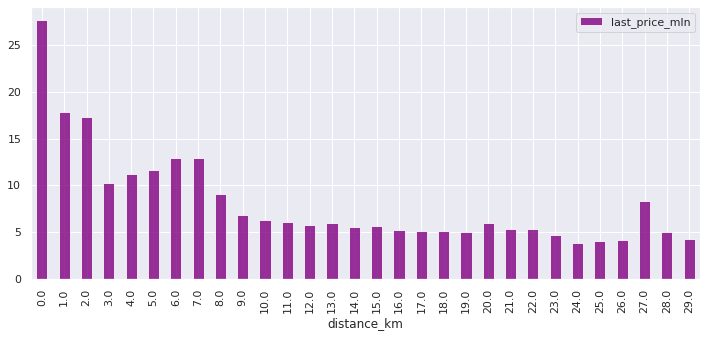

In [65]:
data.query('locality_name =="Санкт-Петербург"').pivot_table(index='distance_km', values='last_price_mln', aggfunc = 'mean').plot(grid=True,kind = 'bar', figsize=(12, 5), color = 'purple', alpha = 0.8)
#строка длинная, перенос не сработал


С увеличением расстояния до центра города цена в среднем снижается (за исключением некоторых выбросов - например, 27 км. Возможно, там расположен элитный поселок и пр.)

### Общий вывод

В результате проведенного исследования был детально изучен архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за период с 2014 по 2019 год из сервиса Яндекс.Недвижимость. 

* В центре исследования были основные характеристики объектов недвижимости (общая/жилая площадь, цена, количество комнат, отдаленность от основных социально-значимых точек и пр.)

* Была осуществлена предобработка данных: идентифицированы и (где возможно) заменены/очищены пропущенные значения, скорректированы типы данных (где было необходимо) и удалены неявные дубликаты и аномалии.

* Кроме того, в исходный датасет были добавлены необходимые для исследовательского анализа расчетные столбцы.

* Выделены ключевые характеристики (максимальное, минимальное, среднее значение, медиана) каждой задействованной в анализе переменной. Для удобства восприятия приведены визуализации.

Так, профиль наиболее часто встречающейся квартиры выглядит следующим образом: 
 * Общая площадь не превышает 100 кв.м.
 * Жилая площадь не превышает 50 кв.м. (Квартир с жилой площадью ~18 м.кв. и ~30 кв.м. больше, чем остальных)
 * Площадь кухни не превышает 15 кв.м. (Чаще всего в квартирах из выборки площадь кухни = 6, 10, 8, 9 и 7 кв. метров.)

* Цена не превышает 20 млн. рублей (Чаще всего цена квартир из выборки = 4-4,5 млн. рублей)
* Количество комнат: 1 или 2
* Высота потолков: от 2.5 до 2.65 метров
* Этаж: от 2 до 5

* *объявление о продаже выставлялось в четверг или вторник, в феврале или марте


С содержательной точки зрения было получено, что такие переменные, как общая площадь, жилая площадь, количество комнат, оказывают положительное влияние на цену продажи (прирост каждого из данных показателей на единицу выражается в  увеличении цены квартиры).

* Квартиры на первых этажах, как видится, менее востребованы. 

Низкий спрос выражается низкой цене (относительно квартир, расположенных на других этажах)
* Отдаленность от центра также является важным фактором.

Чем дальше от центра расположен объект, находящийся в продаже, тем в среднем и при прочих равных ниже его цена (тут также можно увидеть "дорогие" районы, расположенные не очень близко к центру)


* Медианное значение активности объявления о продаже - 73 дня; 

Объявления, закрытые менее чем за 3 недели, можно считать "быстрой продажей".

* Средние цены за квадратный метр недвижимости в крупных населенных пунктах выше, чем в малых. 

В Санкт-Петербурге наибольшая цена за квадратный метр жилья среди всех рассматриваемых в рамках проводимого анализа населенных пунктов. Наименьшая цена - в населенных пунктах "Сланцы", "Гатчина", "городской посёлок Будогощь","деревня Старополье", "посёлок станции Свирь"


### Исправленный вывод

<div style="border-radius: 15px; box-shadow: 2px 2px 4px; border: 1px solid; background:Gainsboro; padding: 20px">
    
В результате проведенного исследования был детально изучен архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за период с 2014 по 2019 год из сервиса Яндекс.Недвижимость. 

В центре исследования были основные характеристики объектов недвижимости (общая/жилая площадь, цена, количество комнат, отдаленность от основных социально-значимых точек, количество балконов и пр.)

**Предобработка данных**
    
*В первую очередь были идентифицированы и (где возможно) заменены/очищены пропущенные значения, скорректированы типы данных (где было необходимо) и удалены неявные дубликаты и аномалии:*
    
- пропуски в переменных **"balcony"**, **"is_apartment"** и **"days_exposition"** (число балконов, апартаменты (булев тип), сколько дней было размещено объявление соответственно) были заменены на 0 по смыслу;
    
- пропуски в переменной **"living_area"** (жилая площадь) были заменены медианным значением площади в зависимости от количества комнат;
    
- пропуски в переменной **"kitchen_area"** (площадь кухни) были заменены при помощи корректирующего коэффициента (в виде отношения среднего значения общей площади объектов с пропуском "kitchen_area" к среднему значению жилой площади объектов без пропуска);
    
- пропуски в переменной **"ceiling_height"** (высота потолков) были заменены медианным значением;
    
- строки, в которых пропущены значения переменных **"floors_total"** (общее число этажей в доме) и **"locality_name"** (название населенного пункта) восстановлению не подлежали и были удалены (малое число наблюдений);
    
- переменные **days_exposition** (число дней "активности" объявления), **balcony** и **floors_total** были преобразованы в целочисленный вид;
    
- переменная **first_day_exposition** (дата публикации) была преобразована в более читабельный вид;
    
- в исходный датасет были добавлены необходимые для исследовательского анализа расчетные столбцы:
    
    * **price_per_m** - цена за квадратный метр
    * **weekday_exposition** - день недели публикации объявления
    * **month_exposition** - месяц публикации объявления
    * **year_exposition** - год публикации объявления
    * **distance_km** - расстояние до центра в км
    
- в переменной **"locality_name"** (название населенного пункта) были устранены неявные дубликаты;
    
- в переменных **"ceiling_height"** (высота потолков), **"living_area"**(жилая площадь), **"kitchen_area"**(площадь кухни), **"floors_total"** (общее количество этажей) и **"rooms"**(количество комнат)были устранены аномально высокие и аномально низкие значения;

**Исследовательский анализ данных**  

*Выделены ключевые характеристики (максимальное, минимальное, среднее значение, медиана) каждой задействованной в анализе переменной. Для удобства восприятия приведены визуализации.*
    
- Общая площадь объектов, представленных в выборке, колеблется в диапазоне от 13 до 442 кв. м. Площадь большей части квартир не превышает 100 кв.м.
- Жилая площадь объектов, представленных в выборке, колеблется в диапазоне от 10 до 250 кв. м. Жилая площадь большей части квартир не превышает 50 кв.м. Квартир с жилой площадью ~18 м.кв. и ~30 кв.м. больше, чем остальных;
- Площадь кухни объектов, представленных в выборке, колеблется в диапазоне от 5 до 40 кв. м. Площадь кухни большей части квартир не превышает 15 кв.м. 
Чаще всего в квартирах из выборки площадь кухни = 6, 10, 8, 9 и 7 кв. метров.
- Цена объектов, представленных в выборке, колеблется в диапазоне от 430 тыс. до 401 млн. рублей. Цена большей части квартир не превышает 20 млн. рублей 
Чаще всего цена квартир из выборки = 4-4,5 млн. рублей
- Количество комнат объектов из выборки колеблется от 0 (планировка без изолированных комнат) до 6. Чаще всего в выборке встречаются однокомнатные квартиры, немного реже - двухкомнатные. Реже всего встречаются объекты с 6 комнатами.
- Чаще всего объекты из выборки характеризуются высотой потолков от 2.5 до 2.65 метров
- Объекты из выборки расположены на разных этажах (от 1 до 33). Чаще всего в продаже можно было увидеть квартиры на 2 этаже (наибольшая концентрация наблюдалась в диапазоне от 1 до 5 этажа), реже всего - на 28 - 33 этажах.
- Первые и последние этажи встречаются реже (по сравнению с остальными)
- Этажность домов варьируется от 1 до 36 этажей. Чаще всего выставлялись квартиры в пятиэтажных домах, немного реже - в девятиэтажных. 34-36 этажей встречались крайне редко.
- Расстояние до центра города варьируется от 0.2 до 66 км. (Это вполне логично, в выборке большое количество пригородных объектов)
- Расстояние до ближайшего аэропорта варьируется от 0 до 85 км.
- Чаще всего парк расположен не ближе 441 метров и не дальше 2 км.
- Чаще всего объявления о продаже выставлялись в четверг и вторник, реже всего - в воскресенье.
- Чаще всего объявления о продаже выставлялись в феврале и марте, реже всего - в январе и мае.
- Наибольшее количеcтво объявлений было размещено менее суток. Возможно, они были очень востребованными и претендентов на покупку было много. (Или совсем новые объявления - на момент выгрузки данных они были размещены менее суток)
-Медианное значение активности объявления о продаже - 73 дня
-Объявления, закрытые менее чем за 3 недели, можно считать "быстрой продажей"
    
    
В результате построения гистограмм, диаграмм рассеяния, а также проведения корреляционного анализа было получено, что такие переменные, как **общая площадь**, **жилая площадь**, **количество комнат** и **расположение объекта** оказывают положительное влияние на цену продажи (прирост каждого из данных показателей на единицу выражается в  увеличении цены квартиры).  

Таким образом, рыночная стоимость недвижимости зависит от ряда параметров, таких как **локация**, **этаж**, **количество комнат**, **общая и жилая площадь**. Данный вывод может быть использован для построения автоматизированной системы для своевременной идентификации аномалий и мошенничества.

</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод